In [1]:
import sys

import numpy as np

from matplotlib import pyplot as plt
from skimage.transform import radon, rotate, iradon, resize
from skimage.util import crop
from skimage.filters import gaussian

from tqdm import tqdm_notebook as tqdm

In [2]:
sys.path.append('../')
from VAE.rg_dataset import LRG
from utils.methods import *

In [3]:
data_path = '../data/'
aug=5

lrg_data_set   = LRG(use_kittler=True, n_aug=aug, blur=False, 
                     catalog_dir=data_path + 'catalog/mrt-table4.txt', 
                     file_dir=data_path + 'unlrg')

../data/unlrg:	14245/14245


In [4]:
data = lrg_data_set.data
c_data = np.zeros((len(data), 128, 128))
for i in range(len(data)):
    #resize( crop(data[i], ((24, 24), (24, 24)), copy=False), (64, 64))
    c_data[i] = gaussian(data[i], 2)

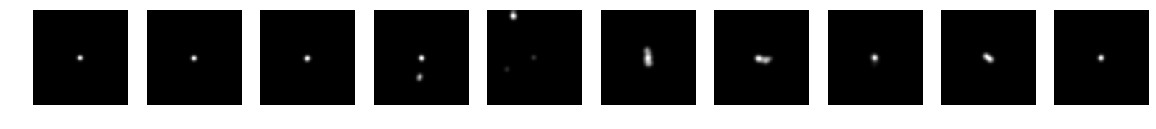

In [5]:
n = 10
f, ax = plt.subplots(1, n, figsize=(20, 5))
for i in range(n):
    ax[i].imshow(c_data[900+i], cmap='gray')
    ax[i].axis('off')

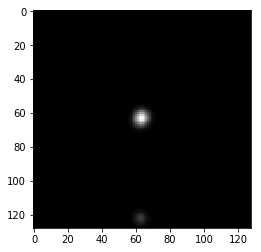

In [12]:
theta = np.linspace(0., 180., 180)

img = c_data[200]

rad = radon(img, theta=theta, circle=True)

l = theta.shape[0]
a = np.argmax(rad) % l
im_rot = rotate(img, -theta[a])
rad = radon(im_rot, theta=theta, circle=True)

plt.imshow(im_rot, cmap='gray')
plt.show()

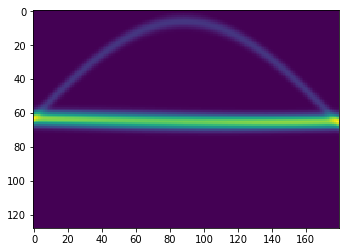

In [13]:
plt.imshow(rad)

In [14]:
rotated_images = []
radons = []

for img in tqdm(c_data):
    rad = radon(img, theta=theta, circle=True)

    l = theta.shape[0]
    a = np.argmax(rad) % l
    im_rot = rotate(img, -theta[a])

    rad = radon(im_rot, theta=theta, circle=True)
    
    rotated_images.append(im_rot)
    radons.append(rad)

In [ ]:
np.save('lrg_norm_radon', d_data)